## Exploratory Data Analysis

### Import Libraries, Load Data, Data Cleanup

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for US Data Analyst Roles

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

### Top 10 Cities with Jobs

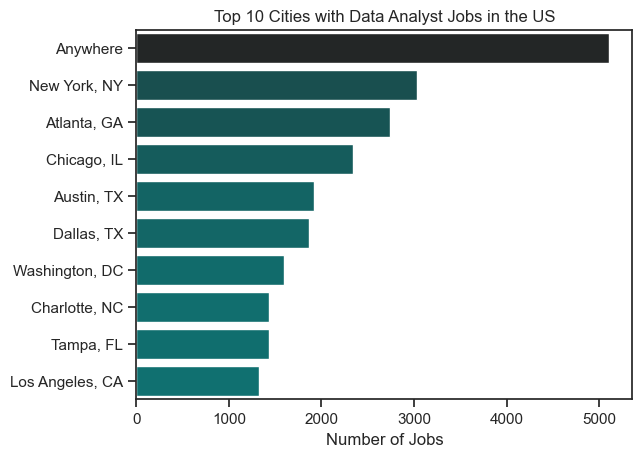

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:teal_r', legend=False)

plt.title('Top 10 Cities with Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
 

plt.show()

### Benefit Analysis

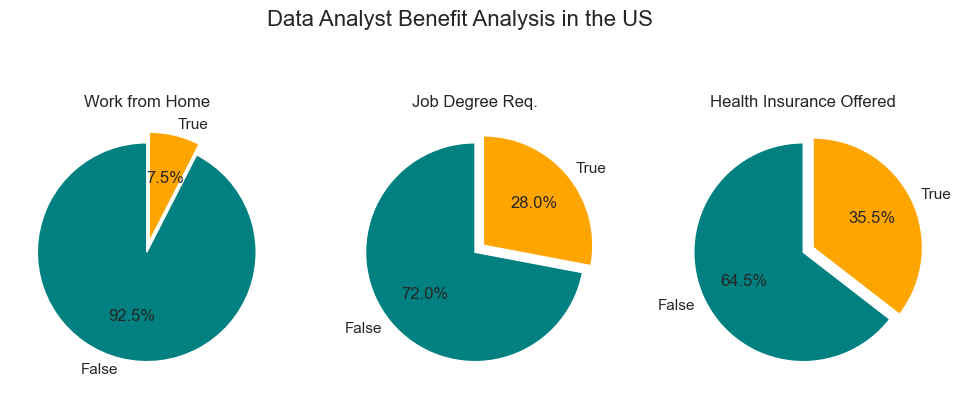

In [4]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered',
}

for  i, (column, title) in enumerate(dict_column.items()):

    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], startangle=90, autopct='%1.1f%%', explode=(0, 0.1), colors=['teal', 'orange'])
    ax[i].set_title(title)

plt.suptitle('Data Analyst Benefit Analysis in the US', fontsize=16)
plt.show()

### Top 10 Companies with Jobs

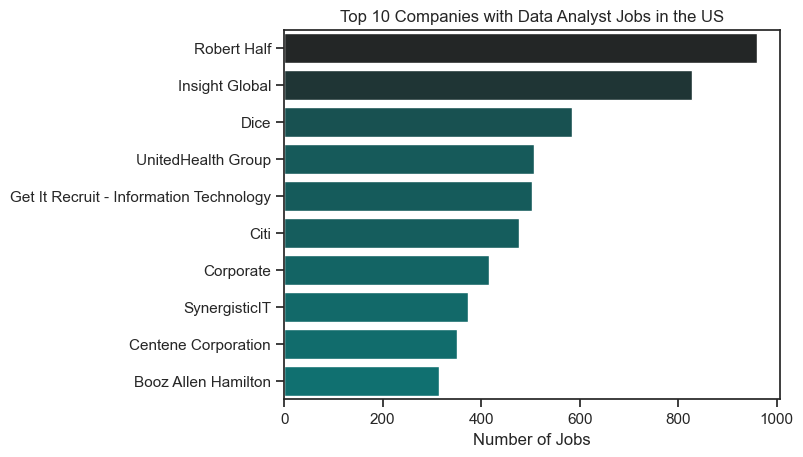

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:teal_r', legend=False)

plt.title('Top 10 Companies with Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
 

plt.show()

### Annual Salaries

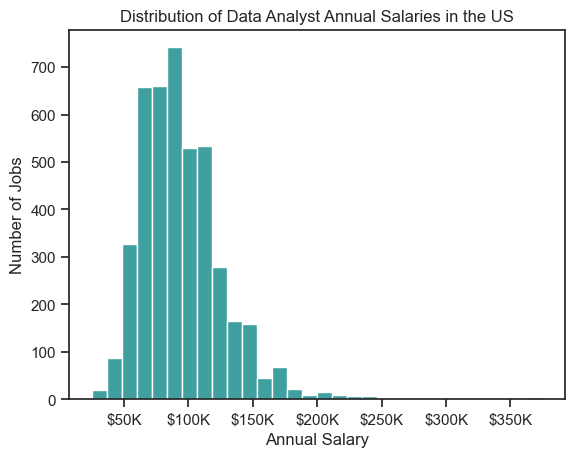

In [6]:
sns.set_theme(style='ticks')
sns.histplot(df_DA_US['salary_year_avg'], bins=30, color='teal')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Annual Salaries in the US')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Monthly Job Posting Trend

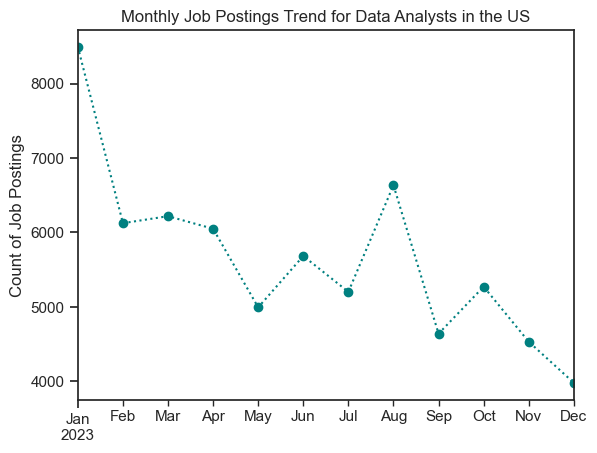

In [7]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.to_period('M')

job_counts = df_DA_US.groupby('job_posted_month').size().reset_index(name='job_count')

job_counts.plot(kind='line', x='job_posted_month', y='job_count', marker='o', color='teal', linestyle=':')
plt.title('Monthly Job Postings Trend for Data Analysts in the US')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.legend().remove()

plt.show()